# **Data Science Track: Course 16**
# **Supervised Learning with Scikit-Learn**

# Chap 1: Classification

### Supervised learning

In [13]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
plt.style.use('ggplot')

### Exploratory data analysis

In [136]:
# Iris dataset in scikit-learn
iris = datasets.load_iris()

In [137]:
type(iris)

sklearn.utils.Bunch

In [138]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [139]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [140]:
iris.data.shape

(150, 4)

In [141]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [142]:
# EDA
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


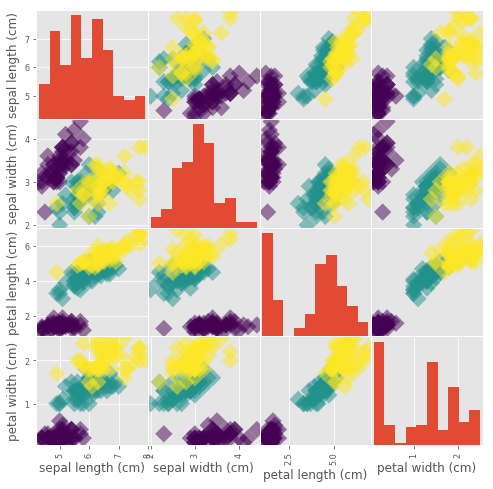

In [32]:
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='D')
plt.show() # c is color

In [14]:
# EXERCISE

In [57]:
# Numerical EDA
# Predict party affiliation based on votes 
# made by US House of Representatives Congressmen

df = pd.read_csv('datasets/house-votes-84.csv',header=None)
df.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df.replace({'n':0,'y':1,'?':0},inplace=True)

In [58]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16), object(1)
memory usage: 57.9+ KB


In [60]:
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
std,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


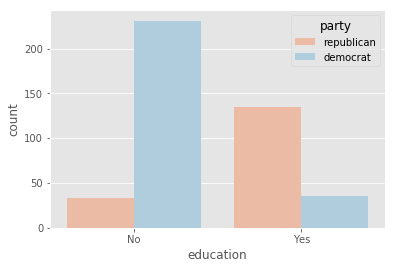

In [64]:
# Visual EDA
# Vote behavior on Education bills
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Democrats voted resoundingly against this bill, compared to Republicans. 

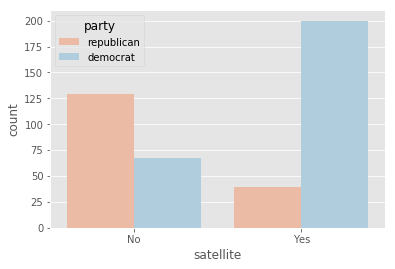

In [63]:
# Vote behavior on Satellite bills
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Mixed voting pattern on this bill.

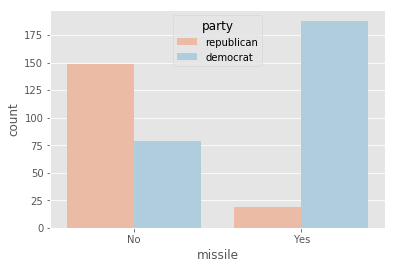

In [65]:
# Vote behavior on Missile bills
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Again mixed voting behavior on missile bill.

### The classification challenge

In [16]:
# K-Nearest Neighbors

In [171]:
# Iris dataset
df_iris = pd.concat([pd.DataFrame(iris.data),pd.DataFrame(iris.target)],axis=1)
df_iris.columns = iris.feature_names + ['species']

In [174]:
setosa = df_iris[df_iris.species==0]
versicolor = df_iris[df_iris.species==1]
virginica = df_iris[df_iris.species==2]

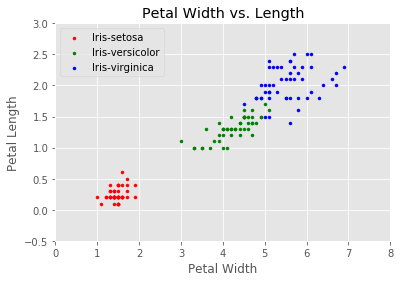

In [181]:
plt.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'],
            marker='.',color='red',label='Iris-setosa')
plt.scatter(versicolor['petal length (cm)'],versicolor['petal width (cm)'],
            marker='.',color='green',label='Iris-versicolor')
plt.scatter(virginica['petal length (cm)'],virginica['petal width (cm)'],
            marker='.',color='blue',label='Iris-virginica')
plt.xlim([0,8])
plt.ylim([-0.5,3.0])
plt.legend.numpoints=3
plt.legend(loc='upper left')
plt.title('Petal Width vs. Length')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.show()

Requirements for Scikit-Learn:
- Data provided as Numpy array or Pandas dataframe
- Features take continuous values
- No missing values in the data
- Features in an array with each column a variable 
  and each row an observation/data-point
- Feature and target no. of rows must match.

In [187]:
# Using scikit-learn to fit a classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [194]:
print(iris['data'].shape)
print(iris['target'].shape)

(150, 4)
(150,)


In [200]:
X_new = np.array([[ 15.2,  13.4,  11.3,  10.3],
                  [ 4.2,  2.8,  1.4,  0.1]])
X_new.shape

(2, 4)

In [201]:
prediction = knn.predict(X_new)
print('Prediction {}'.format(prediction))

Prediction [2 0]


In [202]:
# EXERCISES

In [204]:
# k-Nearest Neighbors: Fit

df = pd.read_csv('datasets/house-votes-84.csv',header=None)
df.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df.replace({'n':0,'y':1,'?':0},inplace=True)

In [228]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [229]:
X_new = pd.DataFrame([0.700181,0.620683,0.916841,0.722895,0.272337,
                      0.660382,0.250985,0.75609,0.784475,0.752666,
                      0.074864,0.597837,0.647635,0.685137,0.739113,
                      0.417089]).T

In [230]:
# k-Nearest Neighbors: Predict

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


### Measuring model performance

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#print("Test set predictions:\n {}".format(y_pred))
knn.score(X_test, y_test)

0.95419847328244278

In [ ]:
# EXERCISES

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

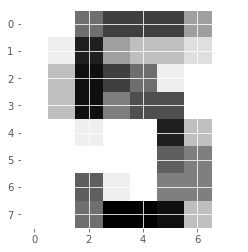

In [235]:
# The digits recognition dataset

# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [236]:
# Train/Test Split + Fit/Predict/Accuracy

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.983333333333


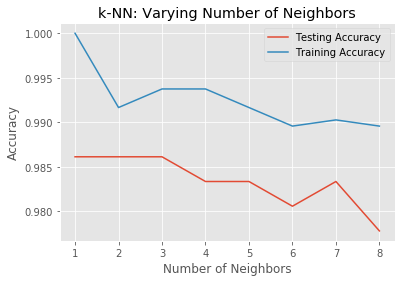

In [237]:
# Overfitting and underfitting

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Chap 2: Regression

In [28]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
plt.style.use('ggplot')

### Introduction to regression

In [239]:
# Boston housing data
boston = pd.read_csv('datasets/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [259]:
# Creating feature and target arrays
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

In [262]:
# Predicting house value from a single feature
X_rooms = X[:,5]
print(type(X_rooms), type(y))
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


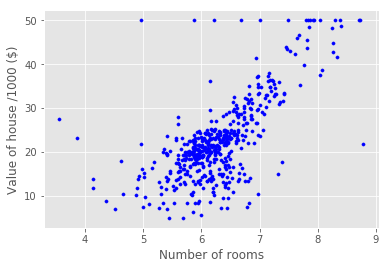

In [263]:
# Plotting house value vs. number of rooms
plt.scatter(X_rooms, y, s=10, c='blue')
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

In [264]:
# Fitting a regression model

import numpy as np
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms),
                               max(X_rooms)).reshape(-1, 1)

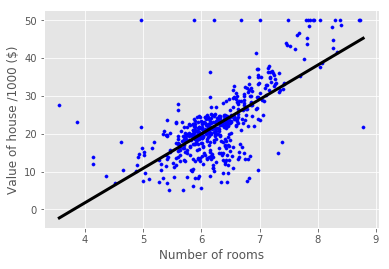

In [272]:
plt.scatter(X_rooms, y, color='blue', s=10)
plt.plot(prediction_space, reg.predict(prediction_space),
         color='black', linewidth=3)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [273]:
# EXERCISES

In [276]:
# Importing data for supervised learning
# Gapminder Countries GDP data

# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


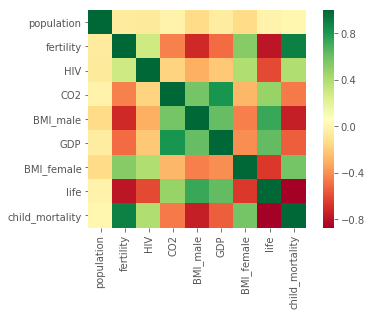

In [280]:
# Exploring the Gapminder data

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

### The basics of linear regression

In [282]:
# Linear regression on all features

X_train, X_test, y_train, y_test = \
train_test_split(X, y,test_size = 0.3, random_state=42)

reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.72989873609074984

In [285]:
# EXERCISE

In [299]:
# Fit & predict for regression

# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values.reshape(-1,1)
X_fertility = df['fertility'].values.reshape(-1,1)

In [304]:
plt.scatter(X_fertility,y,c='blue',s=10);

0.619244216774


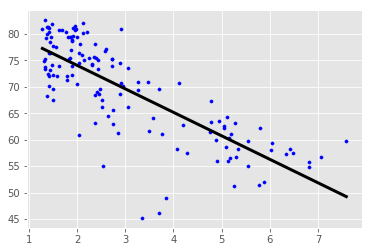

In [305]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [306]:
# Train/test split for regression

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907498
Root Mean Squared Error: 4.194027914110239


### Cross-validation

In [322]:
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)
np.mean(cv_results)

[ 0.71001079  0.75007717  0.55271526  0.547501    0.52410561]


0.61688196444251187

In [325]:
# EXERCISE

In [326]:
# 5-fold cross-validation

# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.71001079  0.75007717  0.55271526  0.547501    0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


### Regularized regression

**Ridge regression** takes the sum of the squared values of the coefficients multiplied by some alpha, this is also known as the L2 regularization. 

In [328]:
# Ridge regression in scikit-learn

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.74001557383978234

**Lasso regression** performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients.

In [329]:
# Lasso regression in scikit-learn

from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.73913024600881294

In [334]:
# Lasso for feature selection in scikit-learn

X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

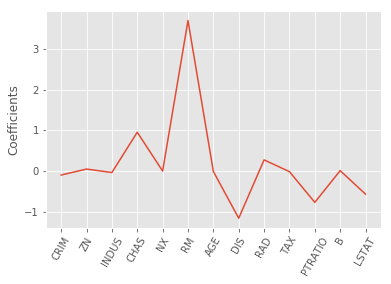

In [339]:
from sklearn.linear_model import Lasso

names = boston.drop('MEDV', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

In [343]:
# EXERCISES

In [369]:
# Regularization I: Lasso

df_columns = df.drop(['life','Region'],axis=1).columns
X = df.drop(['life','Region'],axis=1).values
y = df['life'].values
df_columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

[-0.         -0.         -0.          0.          0.          0.         -0.
 -0.07087587]


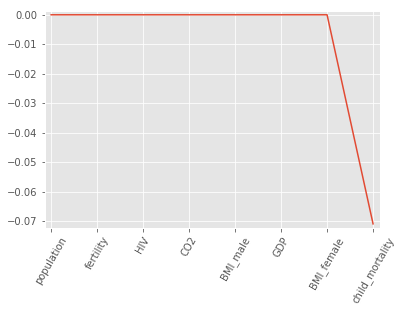

In [371]:
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [385]:
# Regularization II: Ridge
# fitting ridge regression models over a range of different alphas, and plot cross-validated R^2 scores for each.

In [386]:
# function to visualize the scores and standard deviations
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

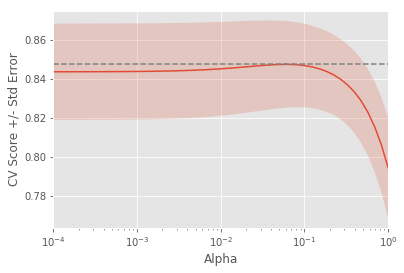

In [387]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? 

# Chap 3: Fine-tuning your model

### How good is your model?

In [391]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
plt.style.use('ggplot')

In [398]:
# Confusion matrix in scikit-learn

df = pd.read_csv('datasets/house-votes-84.csv',header=None)
df.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df.replace({'n':0,'y':1,'?':0},inplace=True)

In [399]:
y = df['party'].values
X = df.drop('party', axis=1).values

In [400]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [401]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[108   7]
 [  6  53]]
             precision    recall  f1-score   support

   democrat       0.95      0.94      0.94       115
 republican       0.88      0.90      0.89        59

avg / total       0.93      0.93      0.93       174



In [411]:
# EXERCISES

In [412]:
# Metrics for classification
# computing a confusion matrix and generating a classification report

df = pd.read_csv('datasets/diabetes.csv')
y = df['diabetes'].values
X = df.drop('diabetes',axis=1).values

In [413]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



### Logistic regression and the ROC curve

In [429]:
# Logistic regression in scikit-learn

df = pd.read_csv('datasets/house-votes-84.csv',header=None)
df.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df.replace({'n':0,'y':1,'?':0},inplace=True)

y = df['party'].map({'republican':0,'democrat':1}).values
X = df.drop('party', axis=1).values

In [430]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

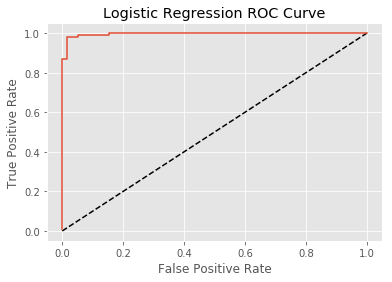

In [431]:
# Plotting the ROC curve

from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [443]:
# EXERCISES

In [444]:
# Building a logistic regression model

df = pd.read_csv('datasets/diabetes.csv')
y = df['diabetes'].values
X = df.drop('diabetes',axis=1).values

In [445]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



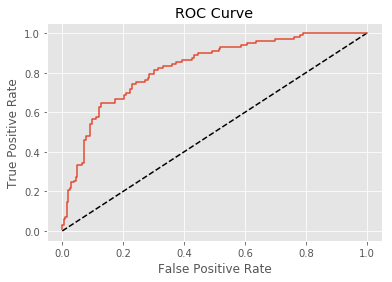

In [447]:
# Plotting an ROC curve

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

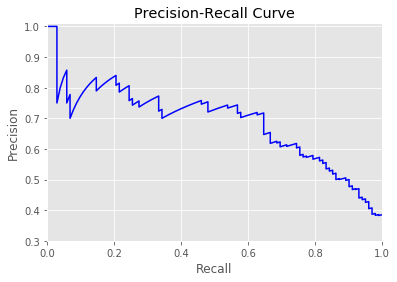

In [462]:
# Precision-recall Curve

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

pr, rc, thld = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.plot(rc, pr,color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0,1.0])
plt.ylim([0.3,1.01])
plt.title('Precision-Recall Curve')
plt.show()

### Area under the ROC curve

In [464]:
# AUC in scikit-learn

from sklearn.metrics import roc_auc_score

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.82686084142394833

In [468]:
# AUC using cross-validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print(cv_scores)

[ 0.7987037   0.80759259  0.81944444  0.86622642  0.85056604]


In [469]:
# EXERCISES

In [470]:
# AUC computation

# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8268608414239483
AUC scores computed using 5-fold cross-validation: [ 0.7987037   0.80759259  0.81944444  0.86622642  0.85056604]


### Hyperparameter tuning

In [471]:
# GridSearchCV in scikit-learn

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 14}
0.7578125


In [472]:
# EXERCISES

In [477]:
# Hyperparameter tuning with GridSearchCV

df = pd.read_csv('datasets/diabetes.csv')
y = df['diabetes']
X = df.drop('diabetes',axis=1)

In [480]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 163789.3706954068}
Best score is 0.7721354166666666


In [483]:
# Hyperparameter tuning with RandomizedSearchCV

# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 6}
Best score is 0.7395833333333334


### Hold-out set for final evaluation

In [ ]:
# EXERCISES

In [486]:
# Hold-out set in practice I: Classification

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


In [497]:
# Hold-out set in practice II: Regression

# Gapminder Countries GDP data
# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df.drop(['life','Region'],axis=1).values

In [502]:
import warnings; warnings.filterwarnings('ignore')

# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.057914133398445


# Chap 4: Preprocessing and pipelines

In [84]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
plt.style.use('ggplot')

### Preprocessing data

In [507]:
df = pd.read_csv('datasets/auto.csv')
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


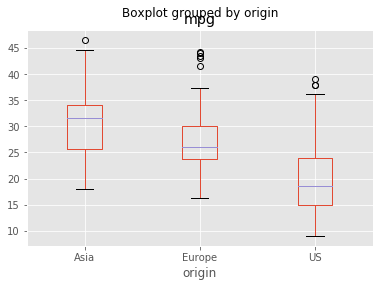

In [537]:
# EDA w/ categorical feature
df.boxplot(column='mpg',by='origin');
plt.show()

In [544]:
# Encoding dummy variables

df_origin = pd.get_dummies(df,drop_first=True)
print(df_origin.head())

    mpg  displ   hp  weight  accel  size  origin_Europe  origin_US
0  18.0  250.0   88    3139   14.5  15.0              0          1
1   9.0  304.0  193    4732   18.5  20.0              0          1
2  36.1   91.0   60    1800   16.4  10.0              0          0
3  18.5  250.0   98    3525   19.0  15.0              0          1
4  34.3   97.0   78    2188   15.8  10.0              1          0


In [550]:
X=df_origin.drop(['origin_Europe','origin_US'],axis=1)
y=df_origin[['origin_Europe','origin_US']]

In [555]:
# Linear regression with dummy variables

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.5, normalize=True).fit(X_train,y_train)
ridge.score(X_test, y_test)

0.28837060656093705

In [552]:
# EXERCISES

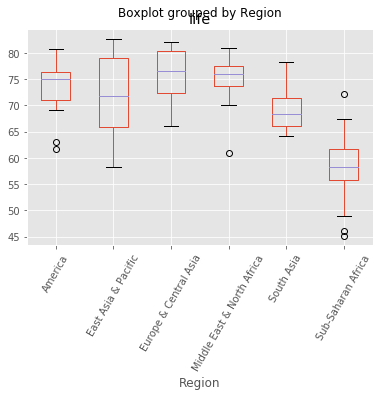

In [560]:
# Exploring categorical features

# Gapminder Countries GDP data
# Read the CSV file into a DataFrame: df
df = pd.read_csv('datasets/gm_2008_region.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

In [564]:
# Creating dummy variables

# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df,drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [565]:
# Create arrays for features and target variable
y = df_region['life']
X = df_region.drop(['life'],axis=1)
X.shape, y.shape

((139, 13), (139,))

In [567]:
# Regression with categorical features

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5,normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X,y,cv=5)

# Print the cross-validated scores
print(ridge_cv)

[ 0.86808336  0.80623545  0.84004203  0.7754344   0.87503712]


### Handling missing data

In [570]:
# PIMA Indians dataset
df = pd.read_csv('datasets/diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [571]:
print(df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [573]:
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [574]:
# Dropping missing data
df.dropna().shape

(393, 9)

In [592]:
# Imputing missing data
y = df['diabetes']
X = df.drop('diabetes',axis=1)

In [593]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X = imp.transform(X)

In [597]:
# Imputing within a pipeline
# Pipeline: All steps before last must be transformers (like impute)
# Pipeline: Last step can be transformer or estimator (like classifier/regressor)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
logreg = LogisticRegression()

steps = [('imputation', imp),('logistic_regression', logreg)]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.76190476190476186

In [ ]:
# EXERCISES

In [598]:
# Dropping missing data

df = pd.read_csv('datasets/house-votes-84.csv',header=None)
df.columns = ['party','infants','water','budget','physician',
              'salvador','religious','satellite','aid','missile',
              'immigration','synfuels','education','superfund',
              'crime','duty_free_exports','eaa_rsa']
df.replace({'n':0,'y':1},inplace=True)

In [601]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


In [602]:
# Imputing missing data in a ML Pipeline I

# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),('SVM', clf)]

In [603]:
# Imputing missing data in a ML Pipeline II

# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train,y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.65      1.00      0.79       151
          1       0.00      0.00      0.00        80

avg / total       0.43      0.65      0.52       231



### Centering and scaling

In [663]:
# Why scale your data?

df = pd.read_csv('datasets/winequality-red.csv',header=0,sep=';')
X = df.drop('quality',axis=1).values
y = df['quality'].values
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [664]:
# Scaling in scikit-learn

from sklearn.preprocessing import scale

X_scaled = scale(X)
print(np.mean(X), np.std(X))
print(np.mean(X_scaled), np.std(X_scaled))

8.13421922452 16.7265339794
2.54662653149e-15 1.0


In [665]:
# Scaling in a pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))

knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))

0.615625
0.49375


In [673]:
# CV and scaling in a pipeline

steps = [('scaler', StandardScaler()),(('knn', KNeighborsClassifier()))]
pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors':np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [674]:
print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'knn__n_neighbors': 1}
0.634375
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.18      0.12      0.15        16
          5       0.66      0.72      0.69       127
          6       0.68      0.60      0.64       131
          7       0.63      0.69      0.66        42
          8       0.25      0.33      0.29         3

avg / total       0.63      0.63      0.63       320



In [675]:
# EXERCISES

In [684]:
# Centering and scaling your data

# White wine quality dataset.
df = pd.read_csv('datasets/white-wine.csv')
y = df.quality < 5
X = df.drop('quality',axis=1).values

In [685]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


In [687]:
# Centering and scaling in a pipeline

# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))

Accuracy with Scaling: 0.964625850340136
Accuracy without Scaling: 0.9666666666666667


----

In [689]:
# Bringing it all together I: Pipeline for classification

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [690]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9693877551020408
             precision    recall  f1-score   support

      False       0.97      1.00      0.98       951
       True       0.43      0.10      0.17        29

avg / total       0.96      0.97      0.96       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


In [702]:
# Bringing it all together II: Pipeline for regression

df = pd.read_csv('datasets/gm_2008_region.csv')
y = df['life'].values
X = df.drop(['life','Region'],axis=1).values

In [705]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline,param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train,y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888217
